In [12]:
import pandas as pd
from CosinorPy import file_parser, cosinor, cosinor1
import numpy as np

In [14]:
transcriptome = pd.read_csv('/Users/michael/Data/Luke_terrace_experiment/General_data/plate1_4_tpm_normalized.csv', index_col = 0)
rows_to_drop_expression_data = ['A2450525897_n01_undetermined',
                'A2449446903_n01_undetermined',
                'B250508004_n01_undetermined',
                'B2449500127_n01_undetermined']
transcriptome = transcriptome.drop(index = rows_to_drop_expression_data)
transcriptome = transcriptome.sort_index()
metadata = pd.read_csv('/Users/michael/Data/Luke_terrace_experiment/General_data/Plates_1_to_4_metadata_merged_luke.csv', index_col = 0,)
metadata = metadata.drop(columns= ['arb.sort','sample-id','Ambiguous Unstranded','Ambiguous Forward','Multimapping','Unmapped Over Mapped'])
metadata['Date and Time'] = metadata['date'] +' ' +  metadata['time']
luke_time_data_format = "%-m/%-d/%y %-H:%-M"
metadata['Date and Time'] = pd.to_datetime(metadata['Date and Time'], format = luke_time_data_format)
unusable_samples = [
    "A2450525897_n01_LICRNA01_A06",
    "A2450525897_n01_LICRNA01_A08",
    "A2450525897_n01_LICRNA01_C11",
    "A2450525897_n01_LICRNA01_D11",
    "A2450525897_n01_LICRNA01_D12",
    "A2449446903_n01_LICRNA02_F01",
    "B2449500127_n01_LICRNA04_A04",
    "B2449500127_n01_LICRNA04_A06",
    "B2449500127_n01_LICRNA04_A07",

]
borderline_unusable = ['A2450525897_n01_LICRNA01_F03', 'A2450525897_n01_LICRNA01_G07','A2449446903_n01_LICRNA02_A04','A2449446903_n01_LICRNA02_H10',"B2449500127_n01_LICRNA04_H02","B2449500127_n01_LICRNA04_H11"]
all_unsable = borderline_unusable+unusable_samples
trimmed_transcriptome = transcriptome.drop(index = all_unsable)
trimmed_metadata = metadata.drop(index= all_unsable)


In [15]:
trimmed_metadata

,plate.pos,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,No Feature,plate_row,plate_col,Total Reads,Experiment Type,Sample Month,daysincestart,Date and Time
filename,,,,,,,,,,,,,,,,,
A2450525897_n01_LICRNA01_A01,A01,LIC001,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2633048.0,112554.0,A,1,2248661.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_B01,B01,LIC002,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,5074184.0,226718.0,B,1,5984566.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_C01,C01,LIC003,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2283008.0,97848.0,C,1,2936453.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_D01,D01,LIC004,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,1263467.0,49095.0,D,1,1359823.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_E01,E01,LIC005,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,3004324.0,135512.0,E,1,2680737.0,Long Term,November,0,2023-11-01 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B2449500127_n01_LICRNA04_D12,D12,LIC640,plant,c2_t06,3/2/24,16:00,LICCIRC_03,LICRNA_04,3683779.0,579120.0,D,12,7589546.0,Circadian Experiment 2,March,122,2024-03-02 16:00:00
B2449500127_n01_LICRNA04_E12,E12,LIC641,plant,c2_t06,3/2/24,16:00,LICCIRC_03,LICRNA_04,1604732.0,248710.0,E,12,2868917.0,Circadian Experiment 2,March,122,2024-03-02 16:00:00
B2449500127_n01_LICRNA04_F12,F12,LIC642,plant,c2_t06,3/2/24,16:00,LICCIRC_03,LICRNA_04,2279211.0,347737.0,F,12,3742922.0,Circadian Experiment 2,March,122,2024-03-02 16:00:00


In [18]:
trimmed_transcriptome

,AT1G01010,AT1G01020,AT1G03987,AT1G01030,AT1G01040,AT1G03993,AT1G01046,AT1G01050,AT1G03997,AT1G01060,...,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp086,ArthCt118,ArthCp083,ArthCt111,ArthCp084,ArthCp085
A2449446903_n01_LICRNA02_A01,0.382839,11.929183,0.0,3.731527,3.602189,0.0,0.0,31.063543,0.0,3.966935,...,17.950907,44.209074,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,6.266498
A2449446903_n01_LICRNA02_A02,0.000000,5.826682,0.0,1.501594,3.439569,0.0,0.0,22.712417,0.0,18.186693,...,1.986484,9.688606,0.0,5.501032,0.0,0.0,0.519342,0.0,0.000000,3.467317
A2449446903_n01_LICRNA02_A03,1.021565,7.683520,0.0,0.301733,2.700528,0.0,0.0,42.431625,0.0,12.937632,...,7.983340,16.384320,0.0,7.983340,0.0,0.0,0.166972,0.0,0.000000,0.000000
A2449446903_n01_LICRNA02_A05,0.732717,3.149144,0.0,1.947758,3.742586,0.0,0.0,26.541337,0.0,23.861601,...,17.178143,17.005325,0.0,0.000000,0.0,0.0,0.628742,0.0,0.000000,0.000000
A2449446903_n01_LICRNA02_A06,1.614233,1.238895,0.0,6.130092,4.215597,0.0,0.0,19.379509,0.0,5.006570,...,16.219201,43.599301,0.0,0.000000,0.0,0.0,1.074213,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_H08,0.074367,4.474710,0.0,1.383813,2.059206,0.0,0.0,27.907884,0.0,11.118408,...,3.486989,4.209645,0.0,1.072920,0.0,0.0,0.948096,0.0,0.000000,0.760798
B250508004_n01_LICRNA03_H09,2.232353,6.249002,0.0,1.873955,3.869254,0.0,0.0,40.686812,0.0,7.391606,...,9.640892,4.655562,0.0,5.085306,0.0,0.0,0.360071,0.0,1.758217,4.807925
B250508004_n01_LICRNA03_H10,0.000000,0.000000,0.0,0.000000,2.953706,0.0,0.0,36.084398,0.0,0.000000,...,0.000000,4.975538,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
B250508004_n01_LICRNA03_H11,0.678594,7.655887,0.0,0.901942,4.195848,0.0,0.0,54.077818,0.0,0.334834,...,0.000000,2.304762,0.0,0.000000,0.0,0.0,0.166371,0.0,0.000000,0.694222


In [19]:


circadian_metadata = trimmed_metadata.loc[trimmed_metadata['Experiment Type'].str.contains('Circadian Experiment 1')]
circadian_transcriptome = trimmed_transcriptome.loc[trimmed_metadata['Experiment Type'].str.contains('Circadian Experiment 1')]
circadian_metadata['Time Since Start'] = (circadian_metadata['Date and Time'] - circadian_metadata['Date and Time'].iloc[0])/pd.Timedelta(hours=1)

#lines below for when we finish all circadian data, until then we only use weekend 1
##circadian_metadata = trimmed_metadata.loc[trimmed_metadata['Experiment Type'].str.contains('Circadian')]

##circadian_transcriptome = trimmed_transcriptome.loc[trimmed_metadata['Experiment Type'].str.contains('Circadian')]





# circadian_expt_2_start_time = circadian_metadata.loc[circadian_metadata['Experiment Type'] == 'Circadian Experiment 2']['Date and Time'].min()
# circadian_metadata['Time Since Start'] = (circadian_metadata['Date and Time'] - circadian_metadata['Date and Time'].iloc[0])/pd.Timedelta(hours=1)
# circadian_metadata['Time Since Start'].loc[circadian_metadata['Experiment Type'] == 'Circadian Experiment 2'] = (circadian_metadata.loc[circadian_metadata['Experiment Type'] == 'Circadian Experiment 2']['Date and Time'] - circadian_expt_2_start_time)/pd.Timedelta(hours=1)

/var/folders/nk/6xkk9sgn1pz4ff1b36sfq3y40000gt/T/ipykernel_54840/3003042135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circadian_metadata['Time Since Start'] = (circadian_metadata['Date and Time'] - circadian_metadata['Date and Time'].iloc[0])/pd.Timedelta(hours=1)


In [20]:
## Filter genes down to speed up fitting regression and not bother analyzing zeros. 
trimmed_circadian_transcriptome = circadian_transcriptome.loc[:, (circadian_transcriptome  > 1).sum() > 50]
trimmed_circadian_transcriptome


,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,AT1G01120,...,ArthCp081,Arthcp087,ArthCr091,ArthCr090,ArthCr089,ArthCt114,ArthCt124,ArthCr088,ArthCp088,ArthCp085
B2449500127_n01_LICRNA04_A01,8.220747,2.802160,3.565160,30.744230,1.082210,3.479682,18.491306,48.544004,748.233266,121.637386,...,746.833022,189.991931,9.961824,0.000000,18.690449,0.000000,1.195814,4.099935,1.287800,2.922135
B2449500127_n01_LICRNA04_A02,7.813482,0.000000,3.759473,40.659946,22.080779,2.234659,19.427491,68.642549,525.797470,136.894843,...,664.261189,234.780388,0.000000,0.000000,39.090869,0.000000,0.000000,9.815932,1.008792,5.341095
B2449500127_n01_LICRNA04_A03,1.744124,0.000000,2.530993,45.627778,21.465215,0.000000,6.795988,54.048891,574.891762,193.350243,...,757.353467,190.334442,0.000000,26.602123,43.684283,0.000000,0.000000,3.675411,0.000000,0.664247
B2449500127_n01_LICRNA04_A05,3.498585,0.636438,2.986464,45.860127,3.425900,1.191887,7.973411,49.835165,620.654040,74.210142,...,460.747630,187.949439,0.000000,1.569468,15.446415,12.179502,0.000000,5.583664,0.000000,4.408779
B2449500127_n01_LICRNA04_B01,1.562912,1.127778,0.928718,41.097875,1.256017,1.676225,13.321643,56.332834,564.354061,119.655681,...,1077.082626,221.957940,7.609508,0.000000,29.708674,12.613020,0.000000,2.058463,1.967416,7.812428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_H08,4.474710,1.383813,2.059206,27.907884,11.118408,0.959827,8.349903,46.544681,615.926075,100.694451,...,887.184004,181.940036,0.000000,19.500054,33.460202,8.598055,3.486989,4.209645,1.072920,0.760798
B250508004_n01_LICRNA03_H09,6.249002,1.873955,3.869254,40.686812,7.391606,2.003849,9.502699,49.843239,396.885544,156.670540,...,941.124405,115.699956,0.000000,1.925504,58.827578,0.000000,9.640892,4.655562,5.085306,4.807925
B250508004_n01_LICRNA03_H10,0.000000,0.000000,2.953706,36.084398,0.000000,0.000000,8.363616,21.519991,469.435651,125.931797,...,782.603734,128.231717,0.000000,0.000000,133.762303,0.000000,0.000000,4.975538,0.000000,0.000000
B250508004_n01_LICRNA03_H11,7.655887,0.901942,4.195848,54.077818,0.334834,4.691971,15.496729,63.435646,483.745498,110.806581,...,448.319292,135.464610,0.000000,0.000000,26.292737,0.000000,0.000000,2.304762,0.000000,0.694222


In [21]:
trimmed_circadian_transcriptome = trimmed_circadian_transcriptome.merge(right = circadian_metadata[['timepoint','Time Since Start']], left_index= True, right_index= True)
trimmed_circadian_transcriptome = trimmed_circadian_transcriptome.set_index('timepoint', append = False)
trimmed_circadian_transcriptome

,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,AT1G01120,...,Arthcp087,ArthCr091,ArthCr090,ArthCr089,ArthCt114,ArthCt124,ArthCr088,ArthCp088,ArthCp085,Time Since Start
timepoint,,,,,,,,,,,,,,,,,,,,,
c1_t08,8.220747,2.802160,3.565160,30.744230,1.082210,3.479682,18.491306,48.544004,748.233266,121.637386,...,189.991931,9.961824,0.000000,18.690449,0.000000,1.195814,4.099935,1.287800,2.922135,28.0
c1_t09,7.813482,0.000000,3.759473,40.659946,22.080779,2.234659,19.427491,68.642549,525.797470,136.894843,...,234.780388,0.000000,0.000000,39.090869,0.000000,0.000000,9.815932,1.008792,5.341095,32.0
c1_t10,1.744124,0.000000,2.530993,45.627778,21.465215,0.000000,6.795988,54.048891,574.891762,193.350243,...,190.334442,0.000000,26.602123,43.684283,0.000000,0.000000,3.675411,0.000000,0.664247,36.0
c1_t12,3.498585,0.636438,2.986464,45.860127,3.425900,1.191887,7.973411,49.835165,620.654040,74.210142,...,187.949439,0.000000,1.569468,15.446415,12.179502,0.000000,5.583664,0.000000,4.408779,44.0
c1_t08,1.562912,1.127778,0.928718,41.097875,1.256017,1.676225,13.321643,56.332834,564.354061,119.655681,...,221.957940,7.609508,0.000000,29.708674,12.613020,0.000000,2.058463,1.967416,7.812428,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c1_t04,4.474710,1.383813,2.059206,27.907884,11.118408,0.959827,8.349903,46.544681,615.926075,100.694451,...,181.940036,0.000000,19.500054,33.460202,8.598055,3.486989,4.209645,1.072920,0.760798,12.0
c1_t05,6.249002,1.873955,3.869254,40.686812,7.391606,2.003849,9.502699,49.843239,396.885544,156.670540,...,115.699956,0.000000,1.925504,58.827578,0.000000,9.640892,4.655562,5.085306,4.807925,16.0
c1_t06,0.000000,0.000000,2.953706,36.084398,0.000000,0.000000,8.363616,21.519991,469.435651,125.931797,...,128.231717,0.000000,0.000000,133.762303,0.000000,0.000000,4.975538,0.000000,0.000000,20.0


In [22]:
cosinor_formatted_circadian_transcriptome = trimmed_circadian_transcriptome.melt(id_vars = 'Time Since Start',var_name='Gene', value_name = 'y')
cosinor_formatted_circadian_transcriptome = cosinor_formatted_circadian_transcriptome.rename(columns = {'Gene':'test','Time Since Start':'x'})
cosinor_formatted_circadian_transcriptome = cosinor_formatted_circadian_transcriptome[['test','x','y']]
cosinor_formatted_circadian_transcriptome

,test,x,y
0,AT1G01020,28.0,8.220747
1,AT1G01020,32.0,7.813482
2,AT1G01020,36.0,1.744124
3,AT1G01020,44.0,3.498585
4,AT1G01020,28.0,1.562912
...,...,...,...
1613631,ArthCp085,12.0,0.760798
1613632,ArthCp085,16.0,4.807925
1613633,ArthCp085,20.0,0.000000
1613634,ArthCp085,24.0,0.694222


In [33]:
cosinor_formatted_circadian_transcriptome.to_csv('/Users/michael/Data/Luke_terrace_experiment/Output_for_Luke/Cosinor_gene_plotting_data.csv', index = False)

In [27]:
cosinor_gene_results = cosinor1.fit_group(cosinor_formatted_circadian_transcriptome, period = [24], plot_on = False )

In [31]:
cosinor_gene_results.to_csv('/Users/michael/Data/Luke_terrace_experiment/Output_for_Luke/Gene_cosine_results_circadian_experiment_1.csv', index = False)

In [24]:
def plot_single_gene_cosinor(gene_name):
    single_gene_data = cosinor_formatted_circadian_transcriptome.loc[cosinor_formatted_circadian_transcriptome['test'] == gene_name]
    results = cosinor1.fit_group(single_gene_data, period = [24], plot_on = True )
    print(results)

In [25]:
cosinor_gene_results.sort_values(by = 'q').head(20)

NameError: name 'cosinor_gene_results' is not defined

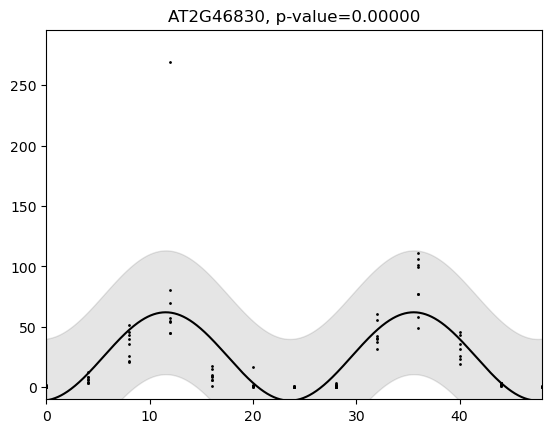

        test  period             p             q  amplitude  p(amplitude)  \
0  AT2G46830    24.0  2.225084e-17  2.225084e-17  36.555938  3.267348e-26   

   q(amplitude)                            CI(amplitude)  acrophase  \
0  3.267348e-26  [29.791162334579816, 43.32071462144045]  -3.022966   

    p(acrophase)   q(acrophase)                            CI(acrophase)  \
0  9.995344e-218  9.995344e-218  [-3.21108433154816, -2.834846804575057]   

   acrophase[h]  
0     11.546878  


In [26]:
plot_single_gene_cosinor('AT2G46830')

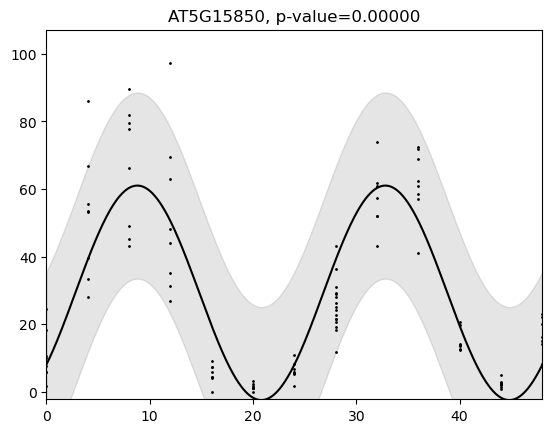

        test  period             p             q  amplitude  p(amplitude)  \
0  AT5G15850    24.0  4.821548e-30  4.821548e-30  31.724396  2.952672e-61   

   q(amplitude)                             CI(amplitude)  acrophase  \
0  2.952672e-61  [27.958983663884034, 35.489809119243446]  -2.305139   

   p(acrophase)  q(acrophase)                               CI(acrophase)  \
0           0.0           0.0  [-2.4176885857544996, -2.1925894293528647]   

   acrophase[h]  
0      8.804982  


In [30]:
plot_single_gene_cosinor('AT5G15850')

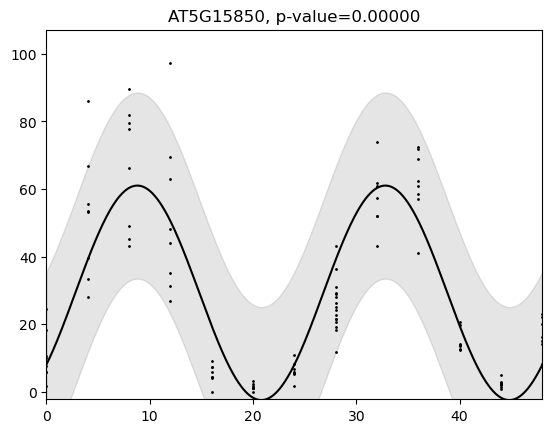

        test  period             p             q  amplitude  p(amplitude)  \
0  AT5G15850    24.0  4.821548e-30  4.821548e-30  31.724396  2.952672e-61   

   q(amplitude)                             CI(amplitude)  acrophase  \
0  2.952672e-61  [27.958983663884034, 35.489809119243446]  -2.305139   

   p(acrophase)  q(acrophase)                               CI(acrophase)  \
0           0.0           0.0  [-2.4176885857544996, -2.1925894293528647]   

   acrophase[h]  
0      8.804982  


In [31]:
plot_single_gene_cosinor('AT5G15850')

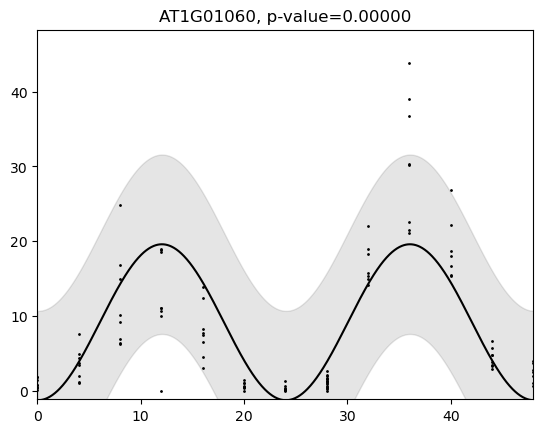

        test  period             p             q  amplitude  p(amplitude)  \
0  AT1G01060    24.0  1.079806e-22  1.079806e-22  10.427311  1.313264e-38   

   q(amplitude)                            CI(amplitude)  acrophase  \
0  1.313264e-38  [8.854566775117929, 12.000055769743595]   3.130199   

   p(acrophase)  q(acrophase)                            CI(acrophase)  \
0           0.0           0.0  [2.974739132189778, 3.2856583074629686]   

   acrophase[h]  
0     12.043522  


In [25]:
plot_single_gene_cosinor('AT1G01060')

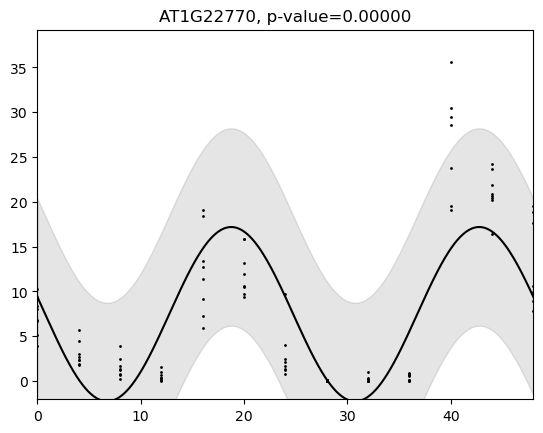

        test  period             p             q  amplitude  p(amplitude)  \
0  AT1G22770    24.0  4.944213e-22  4.944213e-22   9.720626  5.928245e-37   

   q(amplitude)                            CI(amplitude)  acrophase  \
0  5.928245e-37  [8.220438570590453, 11.220813319723316]   1.374443   

   p(acrophase)  q(acrophase)                            CI(acrophase)  \
0  1.189190e-74  1.189190e-74  [1.227078024883195, 1.5218070968167472]   

   acrophase[h]  
0     18.750016  


In [ ]:
plot_single_gene_cosinor('AT1G22770')

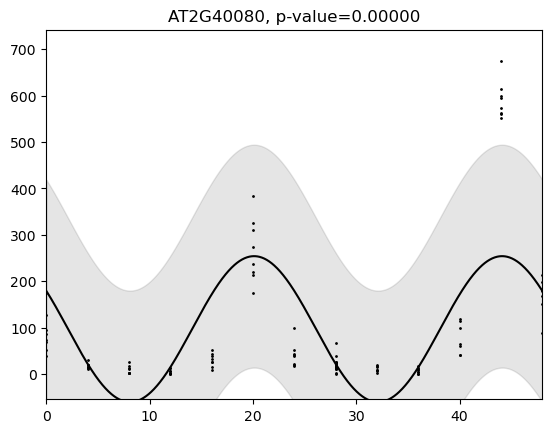

        test  period             p             q   amplitude  p(amplitude)  \
0  AT2G40080    24.0  1.378951e-14  1.378951e-14  157.197047  8.164542e-21   

   q(amplitude)                             CI(amplitude)  acrophase  \
0  8.164542e-21  [124.27152843557053, 190.12256622222276]   1.020565   

   p(acrophase)  q(acrophase)                            CI(acrophase)  \
0  4.422058e-24  4.422058e-24  [0.822944656388028, 1.2181846055415555]   

   acrophase[h]  
0      20.10173  


In [26]:
plot_single_gene_cosinor('AT2G40080')

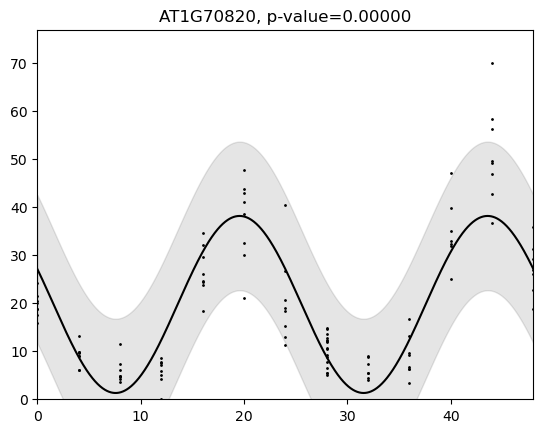

        test  period             p             q  amplitude  p(amplitude)  \
0  AT1G70820    24.0  4.245819e-31  4.245819e-31  18.437067  3.757758e-65   

   q(amplitude)                             CI(amplitude)  acrophase  \
0  3.757758e-65  [16.317127799668025, 20.557005618267258]     1.1623   

   p(acrophase)  q(acrophase)                            CI(acrophase)  \
0  1.282189e-97  1.282189e-97  [1.0536560582189847, 1.270944616013124]   

   acrophase[h]  
0      19.56034  


In [ ]:
plot_single_gene_cosinor('AT1G70820')

In [68]:
cosinor_results

,test,period,p,q,amplitude,p(amplitude),q(amplitude),CI(amplitude),acrophase,p(acrophase),q(acrophase),CI(acrophase),acrophase[h]
0,Actinomycetospora,24.0,5.379308e-12,2.766501e-11,0.383651,3.047744e-16,1.567411e-15,"[0.291630396333432, 0.47567254311538676]",-1.081838,6.856343e-18,2.468284e-17,"[-1.327897921329411, -0.8357787741086257]",4.132318
1,Actinoplanes,24.0,1.515468e-05,2.368931e-05,0.600663,6.900296e-07,1.080046e-06,"[0.36350704159520214, 0.8378191821456924]",-0.942379,6.815204e-06,9.813894e-06,"[-1.3528863034304124, -0.5318714846963519]",3.599622
2,Aetherobacter,24.0,5.978572e-09,1.956624e-08,0.345548,1.616941e-11,5.291806e-11,"[0.24501946864477123, 0.4460770634737622]",-1.109849,2.667294e-13,6.001412e-13,"[-1.4074145149139605, -0.8122838529378874]",4.239312
3,Agrobacterium,24.0,1.128190e-12,1.015371e-11,0.871859,2.181700e-17,1.963530e-16,"[0.6704358865537218, 1.073282661327319]",-0.984750,7.278634e-16,2.015622e-15,"[-1.2240430416224108, -0.7454577225670973]",3.761469
4,Aureimonas_A_501549,24.0,7.760615e-06,1.269919e-05,0.195302,2.911548e-07,4.764351e-07,"[0.12067146970843007, 0.2699316454512998]",-1.715619,4.324284e-20,2.594571e-19,"[-2.0819228279376887, -1.3493143714203895]",6.553180
5,Blastococcus,24.0,9.247049e-13,1.015371e-11,0.399117,1.590179e-17,1.908215e-16,"[0.3073072149039414, 0.4909267356202305]",-1.086556,1.733470e-19,7.803712e-19,"[-1.3224212990092707, -0.850691131094987]",4.150339
6,Brevundimonas,24.0,3.659592e-07,7.749723e-07,0.330625,4.997165e-09,1.058223e-08,"[0.2198016341469156, 0.44144802465301924]",-1.943269,3.057935e-33,2.752142e-32,"[-2.260336104381141, -1.6262023927273979]",7.422742
7,Caldora,24.0,1.174420e-11,5.284891e-11,0.310880,1.029738e-15,4.633819e-15,"[0.23493692534154612, 0.386823883046449]",-0.781499,2.514597e-09,4.114796e-09,"[-1.0384761442245374, -0.5245227742938336]",2.985108
8,Chryseobacterium_A_796612,24.0,6.802529e-03,7.420940e-03,0.336398,1.234972e-03,1.347242e-03,"[0.13231437725941173, 0.5404809990485882]",0.488410,1.055308e-01,1.117385e-01,"[-0.10300168951299726, 1.0798207898939212]",22.134413
9,Flavobacterium,24.0,2.125387e-03,2.391060e-03,3.225167,3.098560e-04,3.485880e-04,"[1.4726425179598766, 4.9776911621599345]",-1.167598,3.418771e-05,4.558362e-05,"[-1.719882393676773, -0.6153144360048817]",4.459897


In [12]:
test_dataframe_cosinor = file_parser.generate_test_data(phase = 0, n_components = 1, name="test1", noise=0.5, replicates = 3)

In [13]:
test_dataframe_cosinor

,test,x,y
0,test1,0.0,0.469087
1,test1,2.0,1.011777
2,test1,4.0,0.954354
3,test1,6.0,0.061619
4,test1,8.0,0.287558
...,...,...,...
20,test1,40.0,-1.937984
21,test1,42.0,0.588971
22,test1,44.0,0.673770
23,test1,46.0,1.540919
